# Problem Statement

#### A book recommendation system is a type of recommendation system where we have to recommend similar books to the reader based on his interest. We’ve all record and data with three different dataset 
##### Book dataset (ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L); 
##### Users dataset (User-ID, Location, Age); 
##### Ratings dataset (User-ID, ISBN, Book-Rating). 

Providing specific data analysis and prediction to be done with this data. The main objective is to build a predictive recommender model, which could help in predicting – how we can predict the best recommendation for users according to their items approach. This would help us in providing better recommendation item to a right specific user.




In [1]:
#Importing Libaries
import re
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from pandas.api.types import is_numeric_dtype
from sklearn.metrics.pairwise import cosine_similarity


import warnings
warnings.filterwarnings("ignore")

## Reading Datasets

In [2]:
books= pd.read_csv('Books.csv', encoding='latin-1',low_memory=False)
ratings=pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

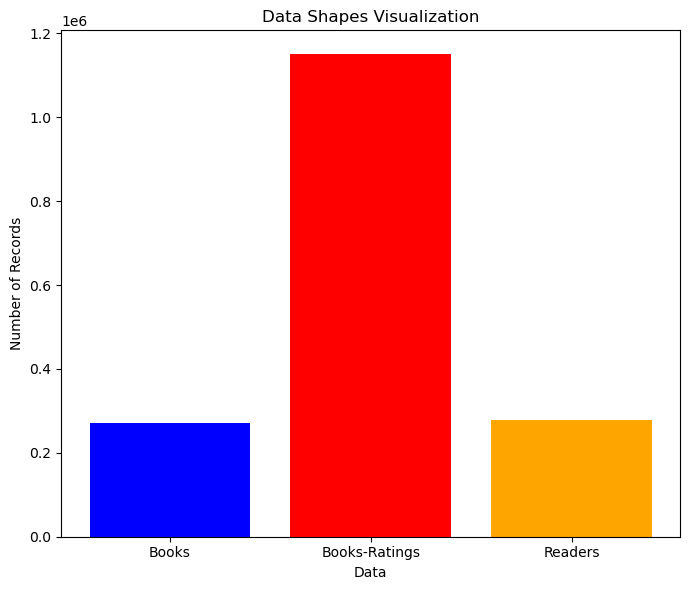

In [3]:
# Get the shapes
shapes = [books.shape[0], ratings.shape[0], users.shape[0]]
labels = ['Books', 'Books-Ratings', 'Readers']

# Create a bar plot
plt.figure(figsize=(7, 6))
plt.bar(labels, shapes, color=['blue', 'red', 'orange'])
plt.xlabel('Data')
plt.ylabel('Number of Records')
plt.title('Data Shapes Visualization')
plt.tight_layout()

# Show the plot
plt.show()

## Exploring the Dataset

In [4]:
books.head().T

,0,1,2,3,4
ISBN,0195153448,0002005018,0060973129,0374157065,0393045218
Book-Title,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic...,The Mummies of Urumchi
Book-Author,Mark P. O. Morford,Richard Bruce Wright,Carlo D'Este,Gina Bari Kolata,E. J. W. Barber
Year-Of-Publication,2002,2001,1991,1999,1999
Publisher,Oxford University Press,HarperFlamingo Canada,HarperPerennial,Farrar Straus Giroux,W. W. Norton &amp; Company
Image-URL-S,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0393045218.0...
Image-URL-M,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0393045218.0...
Image-URL-L,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
print(books.ndim)
print(ratings.ndim)
print(users.ndim)

2
2
2


In [8]:
# dimension of all dataset
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


In [9]:
#Checking the Columns of the data
print(books.columns)
print(ratings.columns)
print(users.columns)

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')
Index(['User-ID', 'Location', 'Age'], dtype='object')


In [10]:
#Checking Unique Values in the Data
print(books.nunique())
print(ratings.nunique())
print(users.nunique())

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       118
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64
User-ID     278858
Location     57339
Age            165
dtype: int64


In [11]:
# Check datatypes & missing values
print(books.info())
print(ratings.info())
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2),

In [12]:
# Missing Value Count Function
def show_missing(y):
    missing = y.columns[y.isnull().any()].tolist()
    return missing

def print_missing(x):
  # Missing data counts and percentage
  print('Missing Data Count')
  print(x[show_missing(x)].isnull().sum().sort_values(ascending = False))
  print('--'*50)
  print('Missing Data Percentage')
  print(round(x[show_missing(x)].isnull().sum().sort_values(ascending = False)/len(x)*100,2))

In [13]:
# Missing Values in Books Data
print_missing(books)

Missing Data Count
Image-URL-L    3
Publisher      2
Book-Author    1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Image-URL-L    0.0
Publisher      0.0
Book-Author    0.0
dtype: float64


In [14]:
# Missing Values in Ratings Data
print_missing(ratings)

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [15]:
# Missing Values in Users Data
print_missing(users)

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


## Observations:
> In Books dataset Book-Author, Publisher, Image-URL-L columns have 1,2,3 missing values respectively.

> In Ratings dataset there is no missing value in any column.

> In User dataset Age column has 110762 missing values. It is almost 40% of the total data.

In [16]:
#Finding Duplicate values

print(len(users[users.duplicated()]))
print(len(books[books.duplicated()]))
print(len(ratings[ratings.duplicated()]))

0
0
0


## Observations:
> No duplicates

In [17]:
#checking datatypes of data
print(books.dtypes)
print(ratings.dtypes)
print(users.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object
User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object
User-ID       int64
Location     object
Age         float64
dtype: object


# Data Preprocessing and Data Visualize

### 1) Books

In [18]:
# droping the url
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [19]:
# replacing features name in lower case
books.columns= books.columns.str.strip().str.lower()
users.columns= users.columns.str.strip().str.lower()
ratings.columns= ratings.columns.str.strip().str.lower()

In [20]:
pd.set_option('display.max_colwidth', None)

In [21]:
books.isnull().sum()

isbn                   0
book-title             0
book-author            1
year-of-publication    0
publisher              2
dtype: int64

In [22]:
# nan values in particular column
books.loc[(books['book-author'].isnull()),: ]

,isbn,book-title,book-author,year-of-publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [23]:
# nan values in particular column
books.loc[(books['publisher'].isnull()),: ]

,isbn,book-title,book-author,year-of-publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [24]:
# getting unique value from 'year_of_publication' feature
books['year-of-publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [25]:
# Extracting and fixing mismatch in feature 'year-of-publication', 'publisher', 'book_author', 'book_title'
books[books['year-of-publication'] == 'DK Publishing Inc'] 

,isbn,book-title,book-author,year-of-publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [26]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
books[books['year-of-publication'] == 'Gallimard']

,isbn,book-title,book-author,year-of-publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [27]:
books.loc[209538]

isbn                                                                                                             078946697X
book-title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book-author                                                                                                            2000
year-of-publication                                                                                       DK Publishing Inc
publisher                                                      http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
Name: 209538, dtype: object

In [28]:
books.loc[209538]

isbn                                                                                                             078946697X
book-title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book-author                                                                                                            2000
year-of-publication                                                                                       DK Publishing Inc
publisher                                                      http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
Name: 209538, dtype: object

In [29]:
books.loc[220731]

isbn                                                                                 2070426769
book-title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book-author                                                                                2003
year-of-publication                                                                   Gallimard
publisher                          http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
Name: 220731, dtype: object

In [30]:
# function to fix mismatch data in feature 'book-title', 'book-author', ' year-of-publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [31]:
books
# book_list = books[['book-title']]
books.head()

,isbn,book-title,book-author,year-of-publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [32]:
replace_df_value(books, 209538, 'book-title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(books, 209538, 'book-author', 'Michael Teitelbaum')
replace_df_value(books, 209538, 'year-of-publication', 2000)
replace_df_value(books, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 221678, 'book-title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(books, 221678, 'book-author', 'James Buckley')
replace_df_value(books, 221678, 'year-of-publication', 2000)
replace_df_value(books, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 220731,'book-title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(books, 220731, 'book-author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(books, 220731, 'year-of-publication', 2003)
replace_df_value(books, 220731, 'publisher', 'Gallimard')

,isbn,book-title,book-author,year-of-publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [33]:
books.loc[209538]

isbn                                                                                       078946697X
book-title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book-author                                                                        Michael Teitelbaum
year-of-publication                                                                              2000
publisher                                                                           DK Publishing Inc
Name: 209538, dtype: object

In [34]:
books.loc[221678]

isbn                                                                                                   0789466953
book-title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book-author                                                                                         James Buckley
year-of-publication                                                                                          2000
publisher                                                                                       DK Publishing Inc
Name: 221678, dtype: object

In [35]:
books.loc[220731]

isbn                                              2070426769
book-title             Peuple du ciel, suivi de 'Les Bergers
book-author                  Jean-Marie Gustave Le ClÃ?Â©zio
year-of-publication                                     2003
publisher                                          Gallimard
Name: 220731, dtype: object

In [36]:
books.loc[(books['publisher'].isnull()),: ]

,isbn,book-title,book-author,year-of-publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [37]:
# replacing 'Nan' with 'No Mention'
books.loc[(books['isbn'] == '193169656X'),'publisher'] = 'No Mention'
books.loc[(books['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [38]:
books[books['publisher'] == 'No Mention']

,isbn,book-title,book-author,year-of-publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention


In [39]:
## Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

>The Book Dataset has been fixed with perfect matching for all corresponding features.

>Two missing values in the 'publisher column were found and changed to No mention.

>Unwanted columns were removed.


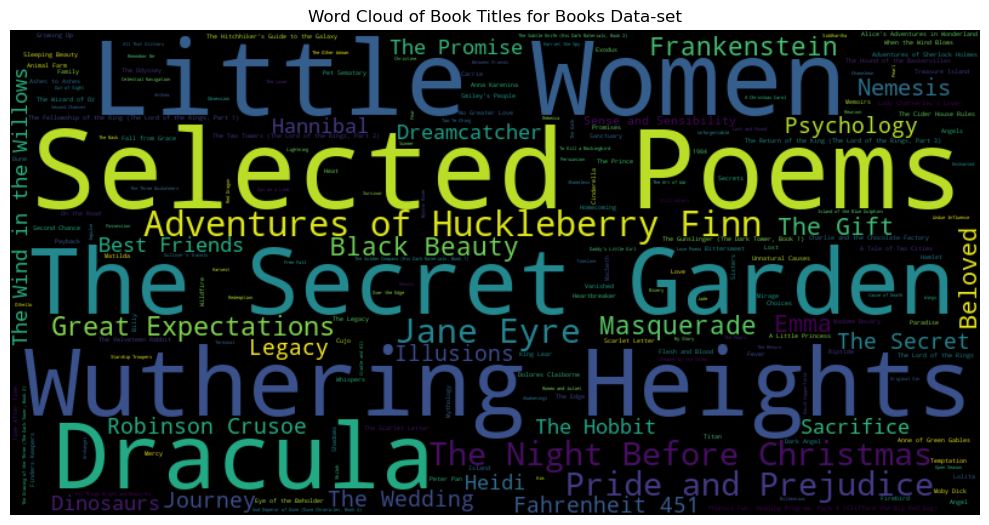

In [40]:
# Calculate the frequency of each Book-Title
title_count = books['book-title'].value_counts()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(title_count)

# Plot the word cloud
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Book Titles for Books Data-set')
plt.tight_layout()

# Display the plot
plt.show()

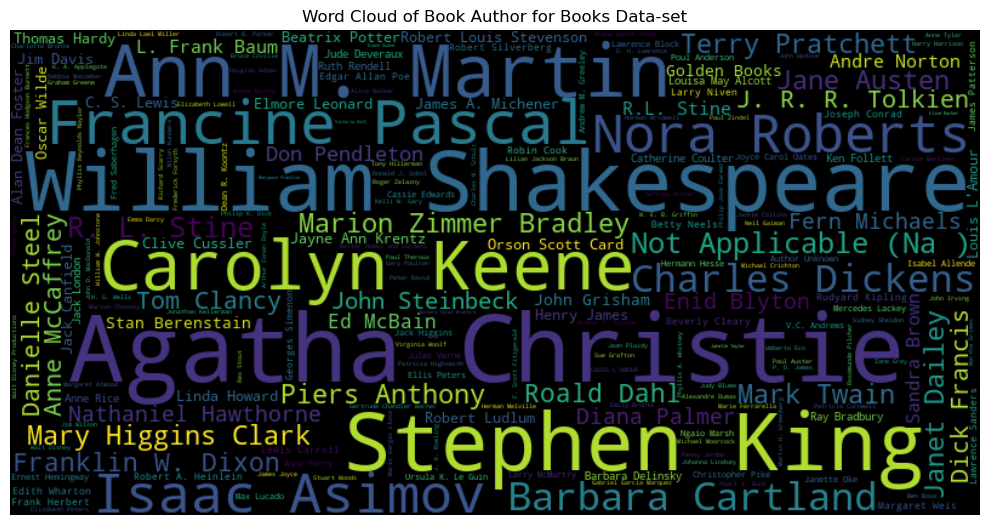

In [41]:
# Calculate the frequency of each Book-Title
title_count = books['book-author'].value_counts()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(title_count)

# Plot the word cloud
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Book Author for Books Data-set')
plt.tight_layout()

# Display the plot
plt.show()

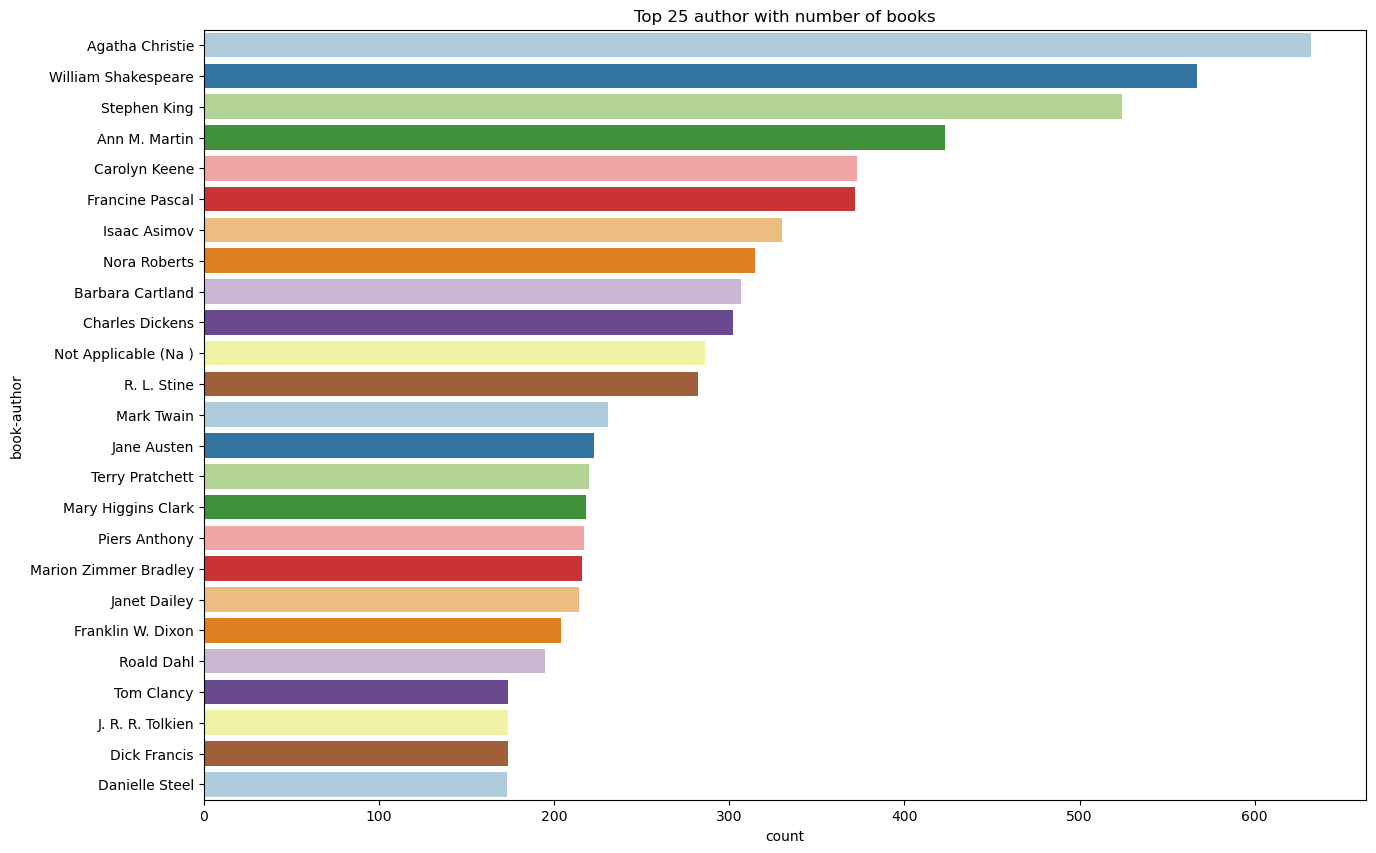

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(y="book-author",palette = 'Paired', data=books, order=books['book-author'].value_counts().index[0:25])
plt.title("Top 25 author with number of books")
plt.show()

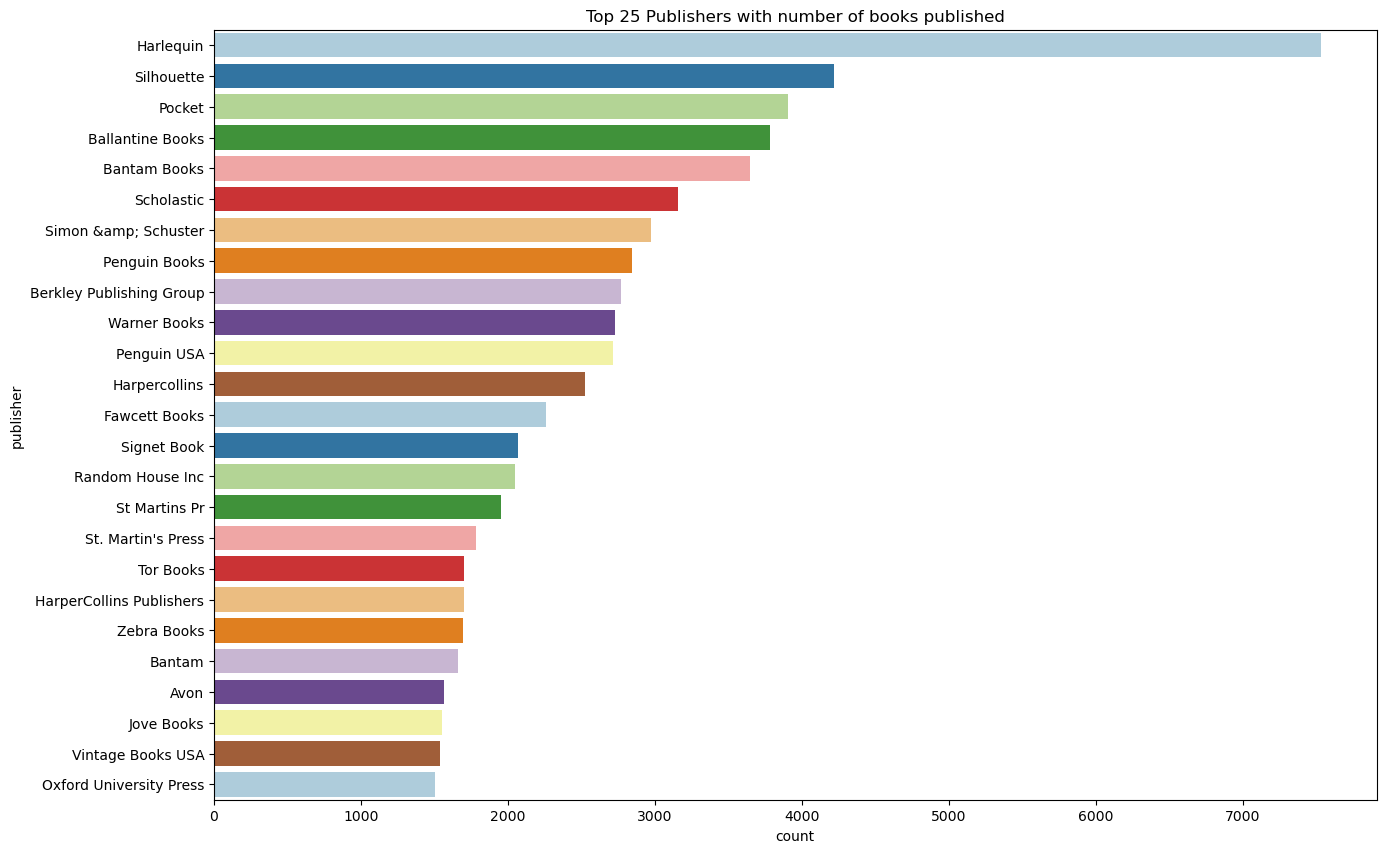

In [43]:
plt.figure(figsize=(15,10))
sns.countplot(y="publisher",palette = 'Paired', data=books,order=books['publisher'].value_counts().index[0:25])
plt.title("Top 25 Publishers with number of books published")
plt.show()

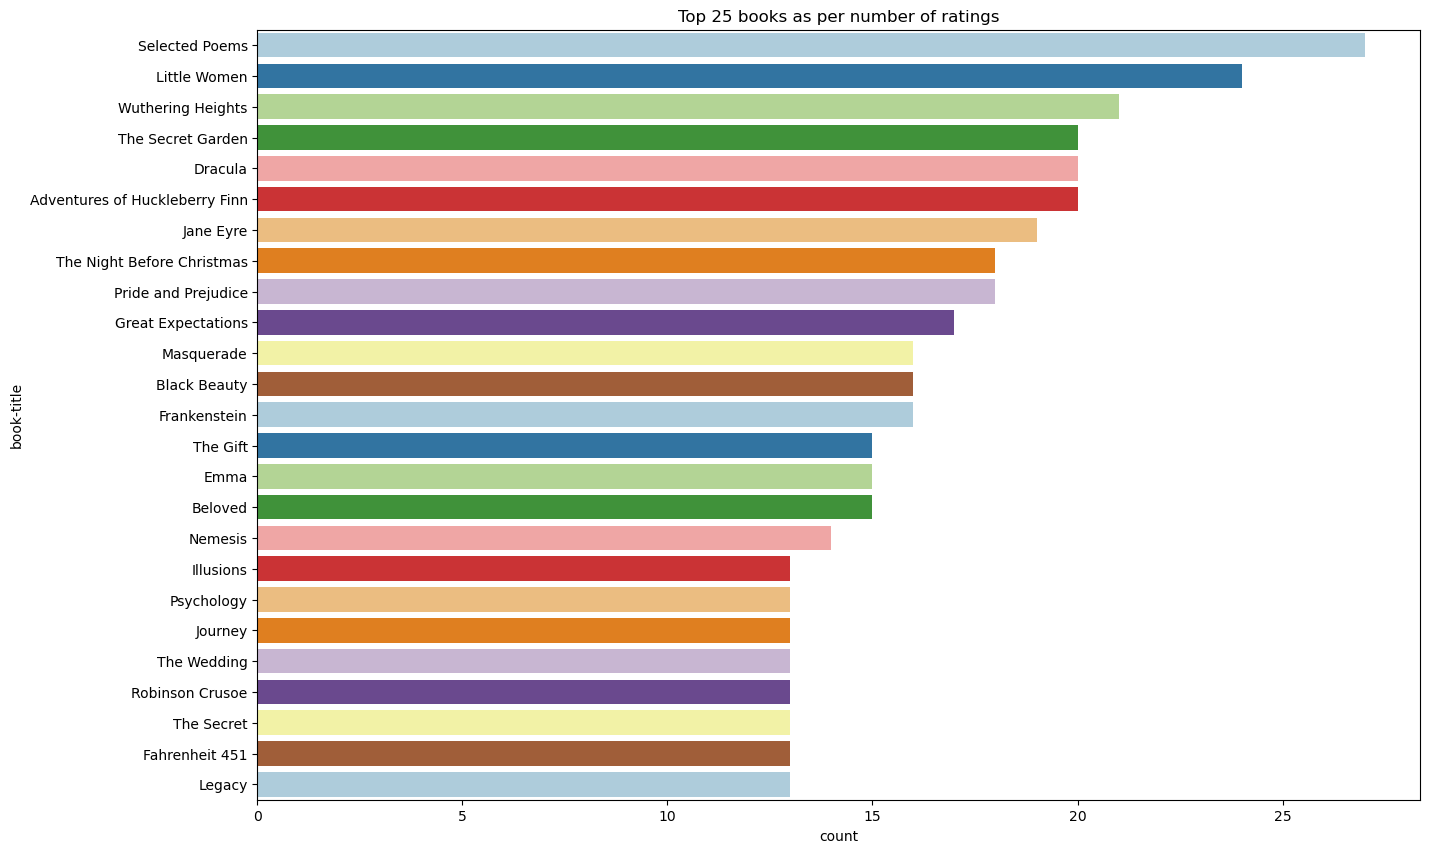

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(y="book-title",palette = 'Paired',data= books, order=books['book-title'].value_counts().index[0:25])
plt.title("Top 25 books as per number of ratings")
plt.show()

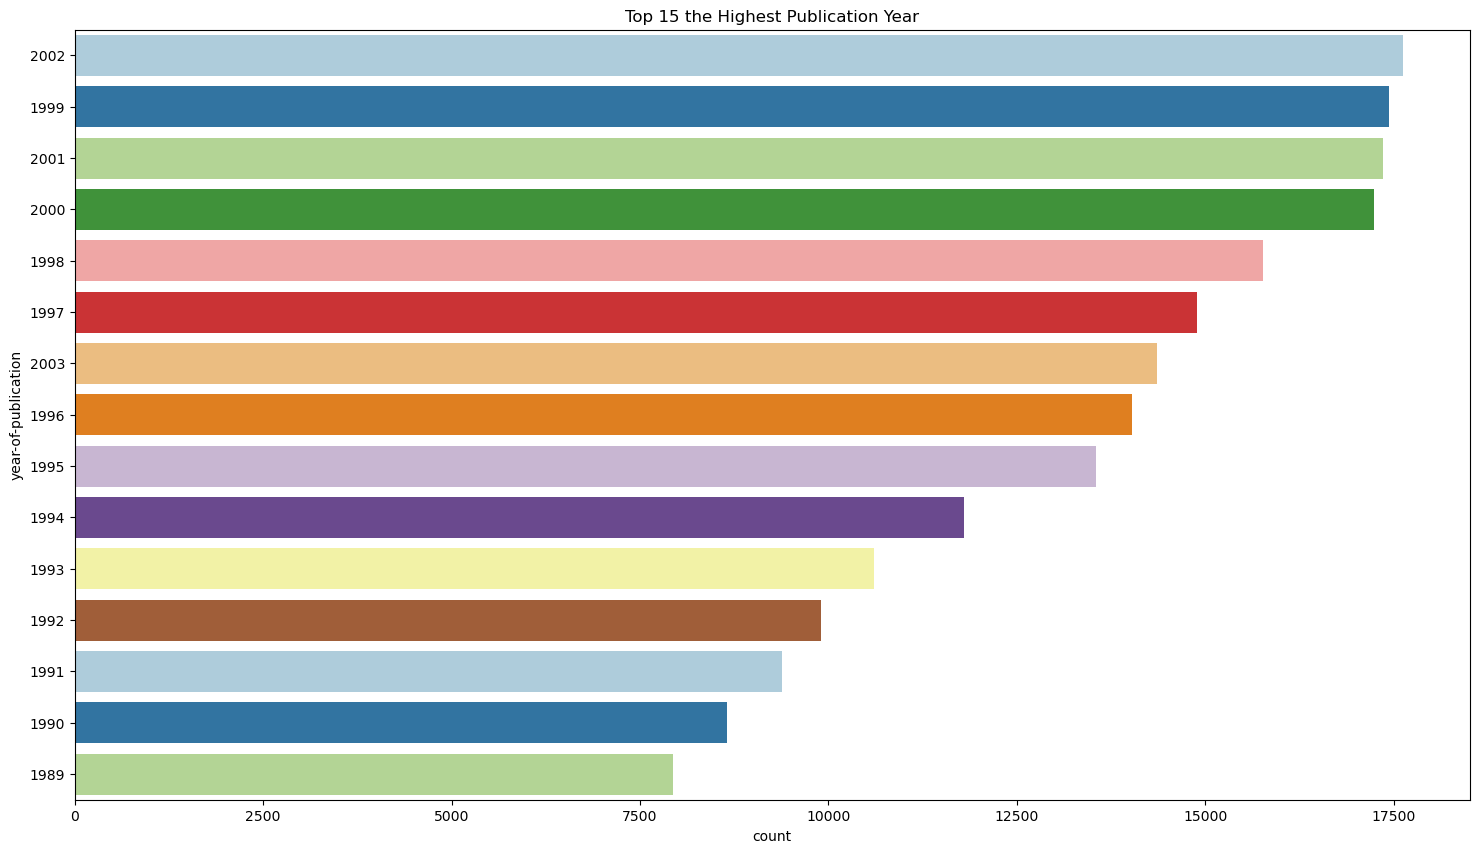

In [45]:
plt.figure(figsize=(18,10))
sns.countplot(y="year-of-publication",palette = 'Paired', data=books,order=books['year-of-publication'].value_counts().index[0:15])
plt.title("Top 15 the Highest Publication Year")
plt.show()

## 2) Users

In [46]:
# users data
users.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user-id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [47]:
users.head()

,user-id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [48]:
# unique value in age
users['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

### Observation
> Non Value are found in Age 

In [49]:
# replacing nan with average of 'age'
users['age'].fillna((users['age'].mean()), inplace=True)

In [50]:
users['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

#### 
> As Age column has values ranging from 0 years to 244 years.It is highly unlikely for users to be of age above 100 years. So we will fill users with age above 90 with mean value of the age column.

In [51]:
# retrieving age data between 5 to 90
users.loc[(users['age'] > 90) | (users['age'] < 5)] = np.nan

In [52]:
users['age'].unique()

array([34.7514337, 18.       , 17.       , 61.       , 26.       ,
       14.       , 25.       , 19.       , 46.       , 55.       ,
       32.       , 24.       , 20.       , 34.       , 23.       ,
       51.       , 31.       , 21.       , 44.       , 30.       ,
       57.       , 43.       , 37.       , 41.       , 54.       ,
       42.       , 50.       , 39.       , 53.       , 47.       ,
       36.       , 28.       , 35.       , 13.       , 58.       ,
       49.       , 38.       , 45.       , 62.       , 63.       ,
       27.       , 33.       , 29.       , 66.       , 40.       ,
       15.       , 60.       ,        nan, 79.       , 22.       ,
       16.       , 65.       , 59.       , 48.       , 72.       ,
       56.       , 67.       , 80.       , 52.       , 69.       ,
       71.       , 73.       , 78.       ,  9.       , 64.       ,
       12.       , 74.       , 75.       , 76.       , 83.       ,
       68.       , 11.       , 77.       , 70.       ,  8.    

In [53]:
users['age'].fillna((users['age'].mean()), inplace=True)

In [54]:
users['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

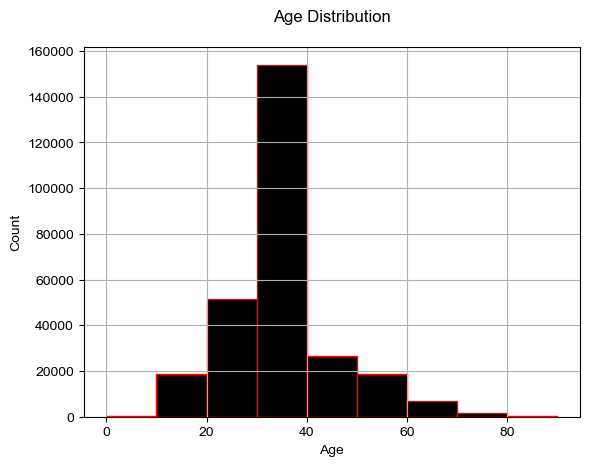

In [55]:
# Age Distribution
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],color='black', edgecolor='red')
sns.set_theme(style="whitegrid")
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [56]:
users.location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [57]:
users.location.nunique()

57083

In [58]:
## 57083 unique Value it's really hard to understand So lets create column Country
for i in users:
  users['Country']=users.location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$') 

In [59]:
users.Country.nunique()

525

In [60]:
#drop location column
users.drop('location',axis=1,inplace=True)     

In [61]:
users.head()

,user-id,age,Country
0,1.0,34.751434,usa
1,2.0,18.000000,usa
2,3.0,34.751434,russia
3,4.0,17.000000,portugal
4,5.0,34.751434,united kingdom


In [62]:
users.isnull().sum()

user-id    1312
age           0
Country    1678
dtype: int64

In [63]:
users['Country']=users['Country'].astype('str')

In [64]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)   

Text(0.5, 1.0, 'Count of users Country wise')

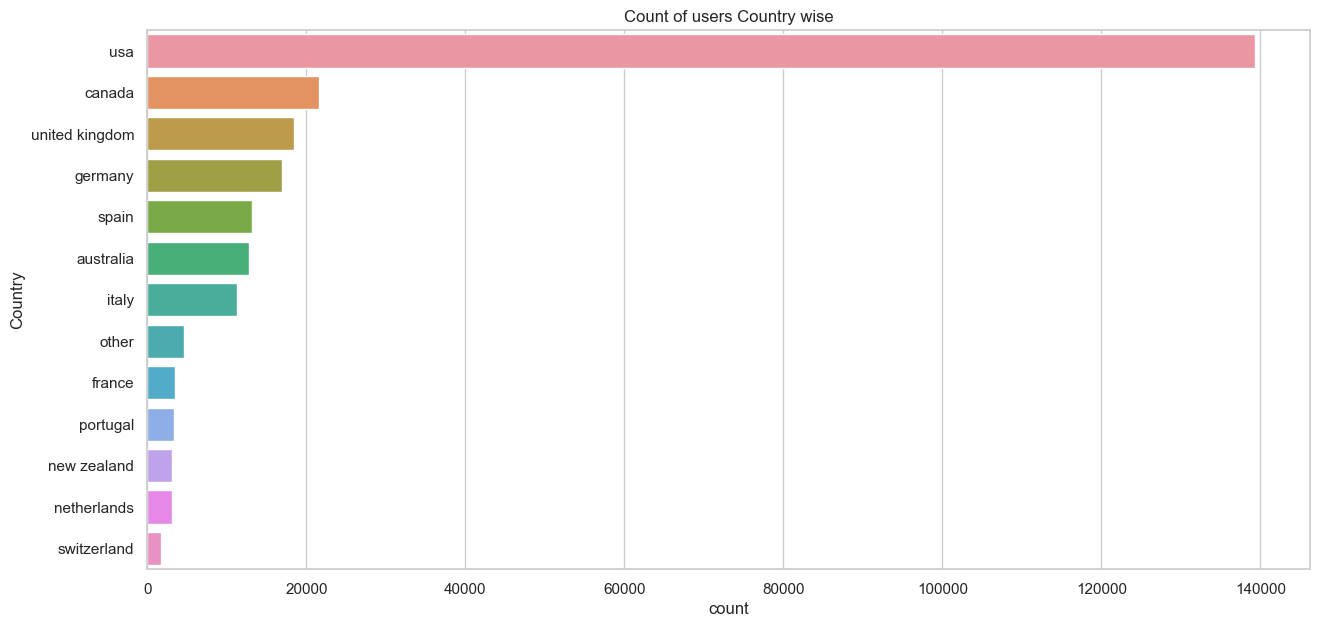

In [65]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:13].index)
plt.title('Count of users Country wise')

> Most users are from USA

## 3) Rating 

In [66]:
ratings.head()

,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [67]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user-id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book-rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [68]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings[ratings.isbn.isin(books.isbn)]
unique_ratings

,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [69]:
# unique ratings from 'book_rating' feature
unique_ratings['book-rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [70]:
print(is_numeric_dtype(ratings['book-rating']))
print(is_numeric_dtype(ratings['user-id']))
print(ratings.shape)
print(unique_ratings.shape)

True
True
(1149780, 3)
(1031136, 3)


In [71]:
## Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

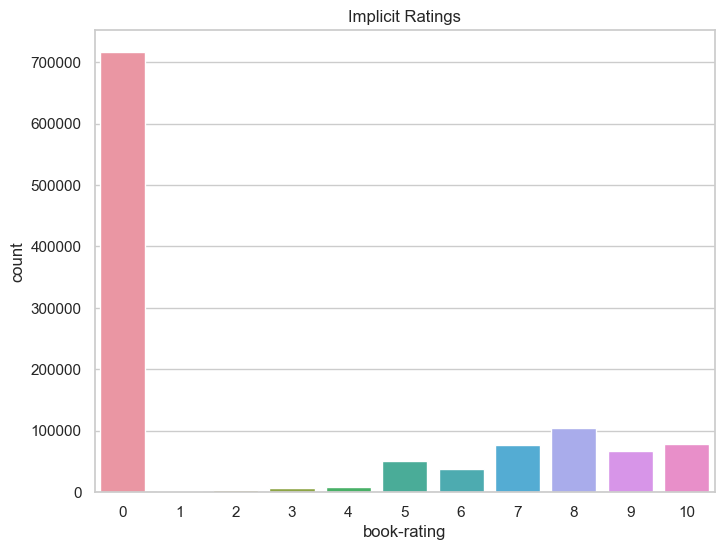

In [72]:
plt.figure(figsize=(8,6))
sns.countplot(x="book-rating", data=ratings)
plt.title('Implicit Ratings')
plt.show()

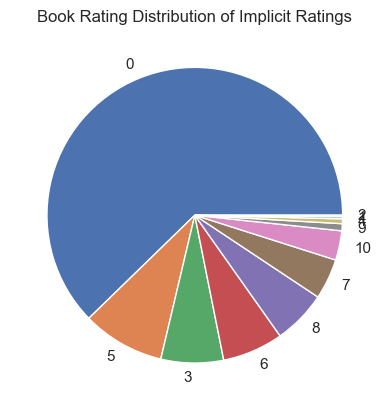

In [73]:
plt.pie(ratings['book-rating'].value_counts(), labels=ratings['book-rating'].unique())
plt.title('Book Rating Distribution of Implicit Ratings')
plt.show()

Text(0.5, 1.0, 'Explicit Ratings')

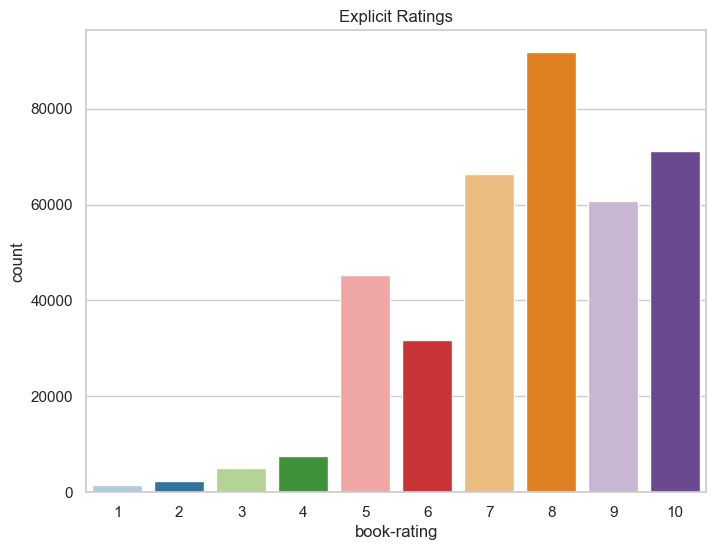

In [74]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book-rating'] != 0]
sns.countplot(x="book-rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

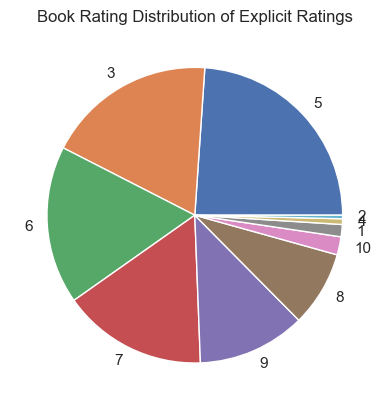

In [75]:
plt.pie(rate_data['book-rating'].value_counts(), labels=rate_data['book-rating'].unique())
plt.title('Book Rating Distribution of Explicit Ratings')
plt.show()

# Merging of all three DataSet into One

In [76]:
merged_df = pd.merge(books, ratings, on='isbn', how='inner')
merged_df = pd.merge(merged_df, users, on='user-id', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026157 entries, 0 to 1026156
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   isbn                 1026157 non-null  object 
 1   book-title           1026157 non-null  object 
 2   book-author          1026156 non-null  object 
 3   year-of-publication  1026157 non-null  object 
 4   publisher            1026157 non-null  object 
 5   user-id              1026157 non-null  int64  
 6   book-rating          1026157 non-null  int64  
 7   age                  1026157 non-null  float64
 8   Country              1026157 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 78.3+ MB


In [77]:
merged_df.head().T

,0,1,2,3,4
isbn,0195153448,0002005018,0060973129,0374157065,0393045218
book-title,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi
book-author,Mark P. O. Morford,Richard Bruce Wright,Carlo D'Este,Gina Bari Kolata,E. J. W. Barber
year-of-publication,2002,2001,1991,1999,1999
publisher,Oxford University Press,HarperFlamingo Canada,HarperPerennial,Farrar Straus Giroux,W. W. Norton &amp; Company
user-id,2,8,8,8,8
book-rating,0,5,0,0,0
age,18.0,34.751434,34.751434,34.751434,34.751434
Country,usa,canada,canada,canada,canada


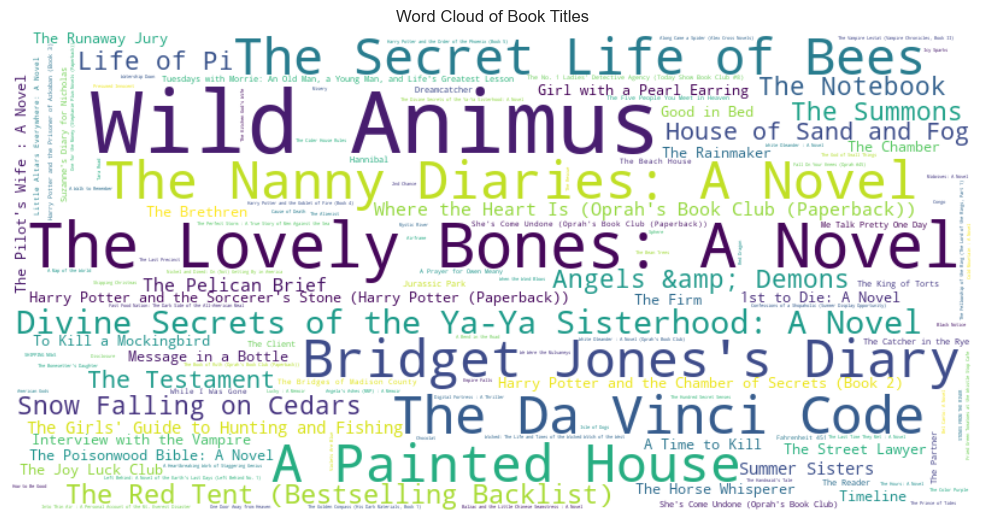

In [78]:
## WORD CLOUD FOR MERGED FILE
title_counts = merged_df['book-title'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.tight_layout()

# Display the plot
plt.show()

## Divide complete data on the basis of Implicit and Explicit ratings datasets

In [79]:
## Explicit Ratings Dataset
Explicit_df = merged_df[merged_df['book-rating'] != 0]
Explicit_df = Explicit_df.reset_index(drop = True)
print(Explicit_df.shape)
Explicit_df.head()

(382117, 9)


,isbn,book-title,book-author,year-of-publication,publisher,user-id,book-rating,age,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,34.751434,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,34.751434,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,34.751434,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,34.751434,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,34.751434,canada


In [80]:
## Implicit Ratings Dataset
Implicit_df = merged_df[merged_df['book-rating'] == 0]
Implicit_df = Implicit_df.reset_index(drop = True)
Implicit_df.shape

(644040, 9)

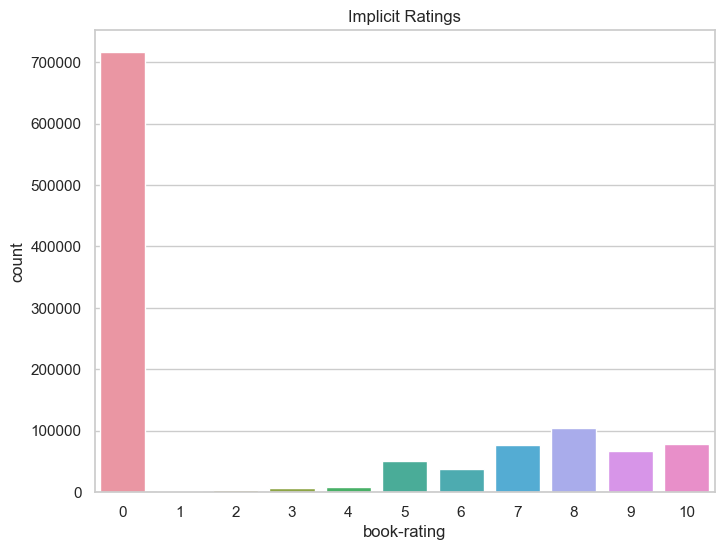

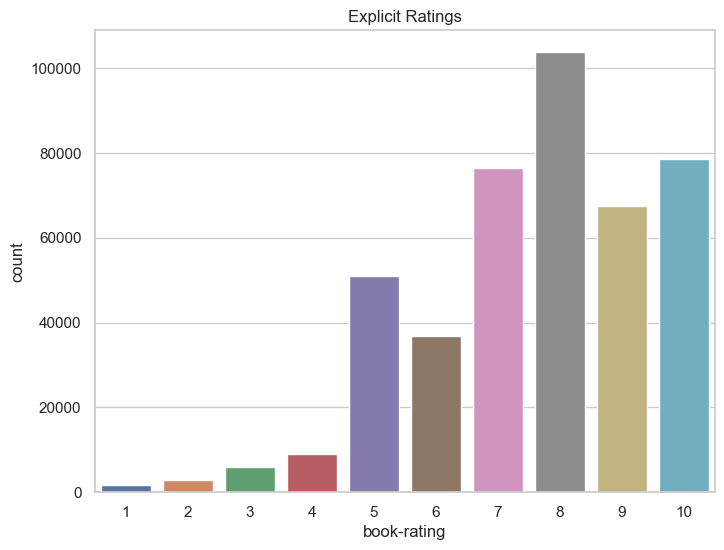

In [81]:
## Implicit Ratings
plt.figure(figsize=(8,6))
sns.countplot(x="book-rating", data=ratings)
plt.title("Implicit Ratings")
     
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['book-rating'] != 0]
sns.countplot(x="book-rating", data=data)
plt.title("Explicit Ratings")
plt.show()

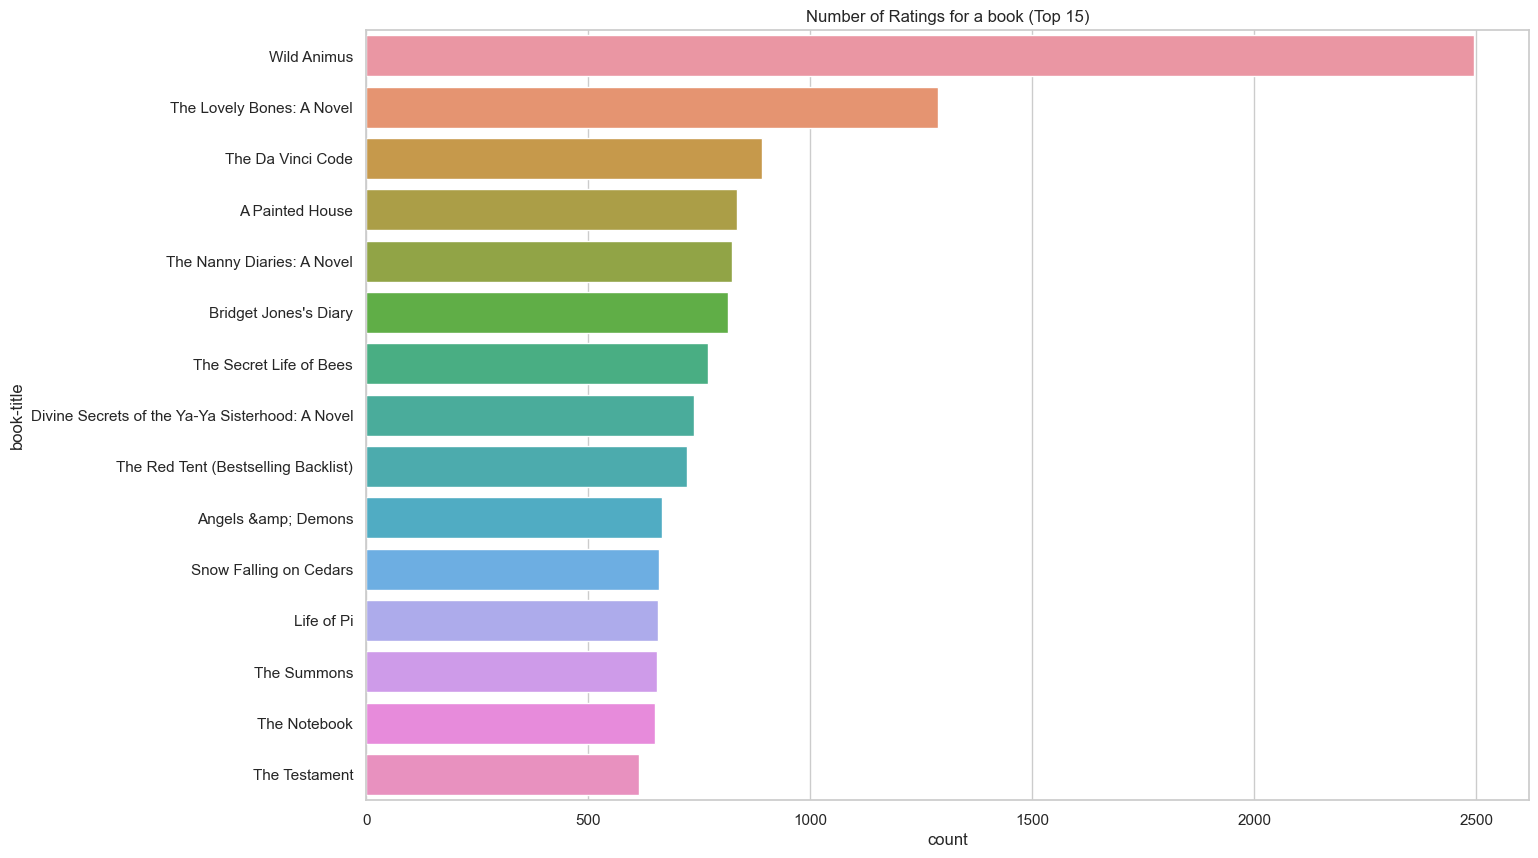

In [82]:
plt.figure(figsize=(15,10))
sns.countplot(y="book-title", data=merged_df, order=merged_df['book-title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book (Top 15)")
plt.show()

# Recommendation System

### 1) Popularity Based Recommender System

In [83]:
ratings_count = pd.DataFrame(Explicit_df.groupby(['isbn'])['book-rating'].sum())
top10 = ratings_count.sort_values('book-rating', ascending = False).head(10)
print("Following books are recommended")
top10.merge(books, left_index = True, right_on = 'isbn')

Following books are recommended


,book-rating,isbn,book-title,book-author,year-of-publication,publisher
408,5750,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4089,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3129,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2761,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2579,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2549,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2514,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2385,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
231,2199,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2143,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


In [84]:
# group by the number of ratings for each book
num_rating_df = Explicit_df.groupby('book-title').count()['book-rating'].reset_index()
num_rating_df.rename(columns={'book-rating':'num_ratings'},inplace=True)
num_rating_df.head()

,book-title,num_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
2,Dark Justice,1
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),2


In [85]:
avg_rating_df = pd.DataFrame(Explicit_df.groupby('book-title')['book-rating'].mean().reset_index())
avg_rating_df.rename(columns={'book-rating': 'avg_rating'}, inplace=True)
avg_rating_df.head()

,book-title,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
2,Dark Justice,10.000000
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7.142857
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),10.000000


In [86]:
# merge num_rating_df and avg_rating_df
popular_df = num_rating_df.merge(avg_rating_df,on='book-title')
popular_df

,book-title,num_ratings,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
2,Dark Justice,1,10.000000
3,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857
4,Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000
...,...,...,...
135116,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Country Inns und Bed und Breakfast der USA.,1,8.000000
135117,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135118,Ã?Â?sterlich leben.,1,7.000000
135119,Ã?Â?stlich der Berge.,1,8.000000


In [87]:
# only keep the books whose number of ratings are more than 250
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [88]:
popular_df.head()

,book-title,num_ratings,avg_rating
45210,Harry Potter and the Prisoner of Azkaban (Book 3),274,9.040146
123275,To Kill a Mockingbird,266,8.984962
45220,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),310,8.961290
45191,Harry Potter and the Chamber of Secrets (Book 2),323,8.835913
115813,The Secret Life of Bees,403,8.478908


# 2) Collaborative Filtering Based Recommender System

In [89]:
# users who have rated more than 200 times
x = merged_df.groupby('user-id').count()['book-rating'] > 200
Good_users = x[x].index

In [90]:
filtered_rating = merged_df[merged_df['user-id'].isin(Good_users)]

In [91]:
# books which have been rated more than 50 times
y = filtered_rating.groupby('book-title').count()['book-rating']>=50
famous_books = y[y].index

In [92]:
final_ratings = filtered_rating[filtered_rating['book-title'].isin(famous_books)]

In [93]:
pt = final_ratings.pivot_table(index='book-title',columns='user-id',values='book-rating')

In [94]:
pt.fillna(0,inplace=True)

In [95]:
pt

user-id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
book-title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
similarity_scores = cosine_similarity(pt)

In [97]:
similarity_scores

array([[1.        , 0.10377079, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10377079, 1.        , 0.23927158, ..., 0.07534752, 0.16973515,
        0.14433158],
       [0.01220856, 0.23927158, 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07534752, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16973515, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14433158, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [98]:
similarity_scores.shape

(699, 699)

In [99]:
def recommend(book_name):
    # fetch index using book_name
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key = lambda x: x[1], reverse=True)[1:6]
    
    data=[]
    for i in similar_items:
        items=[]
#         print(pt.index[i[0]])
        temp_df = books[books['book-title'] == pt.index[i[0]]]
        items.extend(list(temp_df.drop_duplicates('book-title')['book-title'].values))
        
        data.append(items)
    return data

In [100]:
recommend('Zoya')

[['Fine Things'],
 ['Secrets'],
 ['Kaleidoscope'],
 ['Exclusive'],
 ['Five Days in Paris']]

In [101]:
recommend('1st to Die: A Novel')

[['Along Came a Spider (Alex Cross Novels)'],
 ['Roses Are Red (Alex Cross Novels)'],
 ['Pop Goes the Weasel'],
 ['Violets Are Blue'],
 ['The Clinic (Alex Delaware Novels (Paperback))']]

In [102]:
recommend('1984')

[['Animal Farm'],
 ["The Handmaid's Tale"],
 ['Brave New World'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)'],
 ['The Hours : A Novel']]

In [103]:
print("PT index No.55:",pt.index[55])
print ("PT index No.110:", pt.index[110])

PT index No.55: Atonement : A Novel
PT index No.110: Cold Mountain : A Novel


## Model Deployment

In [104]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [105]:
##books.drop_duplicates('book-title')

In [106]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

In [107]:
## pd.options.mode.chained_assignment = None  # default='warn'
## book_list.drop_duplicates(subset ="book-title",keep = False, inplace = True)